# Auto Regressive Network Inference 

To run this notebook:

1. Install the [julia-1.5.3](https://julialang.org/downloads/)

2. Install [PyPlot](https://github.com/JuliaPy/PyPlot.jl) package. To enter in the package manager, just type `]` and from the package manager prompt do a
```
(@v1.5) pkg> add PyPlot
```

3. Install the unregistered [PlmDCA](https://github.com/pagnani/PlmDCA) package. From the package manager prompt do a
```
(@v1.5) pkg> add https://github.com/pagnani/PlmDCA
```

4. Install the ipynb interface in julia, you should add the [IJulia](https://github.com/JuliaLang/IJulia.jl) package using the package manager. Again, from the package manager prompt do a
```
(@v1.5) pkg> add IJulia 
```
Exit the Package Manager (type `backspace` or `delete`) and from julia prompt do a 
```
julia> using IJulia
julia> notebook()
```
The ipynb file manager should open a page on your browser and from there you should navigate to this notebook.


## Load ArDCA package 

The following cell loads the package `ArDCA` on `nprocs` workers (here `nprocs=8`). The first time it takes a while. 

* The `mypkgdir` variable should be set to your `path/to/package` dir.

* The `datadir` variable points to the `five families autoregressive` path we shared.

In [1]:
mypkgdir = normpath(joinpath(pwd(),".."))
datadir=joinpath(mypkgdir,"data") # put here your path
cd(mypkgdir)
using Distributed, PyPlot
nprocs = 8
addprocs(nprocs) # choose the number of cores that you want to use (here nprocs=8)
@everywhere using Pkg
@everywhere Pkg.activate(".")
@everywhere using ArDCA
@everywhere using PlmDCA
include(joinpath(mypkgdir,"julia-notebook/script.jl")); # a script with some utilities

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278


      From worker 6:	 Activating environment at `~/CODE/ArDCA/Project.toml`
      From worker 5:	 Activating environment at `~/CODE/ArDCA/Project.toml`
      From worker 4:	 Activating environment at `~/CODE/ArDCA/Project.toml`
      From worker 7:	 Activating environment at `~/CODE/ArDCA/Project.toml`
      From worker 9:	 Activating environment at `~/CODE/ArDCA/Project.toml`
      From worker 2:	 Activating environment at `~/CODE/ArDCA/Project.toml`
      From worker 3:	 Activating environment at `~/CODE/ArDCA/Project.toml`
      From worker 8:	 Activating environment at `~/CODE/ArDCA/Project.toml`


 Activating environment at `~/CODE/ArDCA/Project.toml`
┌ Info: Precompiling ArDCA [fc7e833f-a3b9-439d-ae82-c6ad11a3e54b]
└ @ Base loading.jl:1278
┌ Info: Precompiling PlmDCA [06784e46-84fc-5582-b8de-0e984192b79e]
└ @ Base loading.jl:1278


## Define the protein family 


The `out` strcture is defined in the `script.jl` file.
```
mutable struct AnalOut
    arnet # the ArDCA inferred model parameters
    arvar # the internal variables
    resori::Union{PlmOut,Nothing} # the PlmDCA output of the original MSA
    resgen::Union{PlmOut,Nothing} # the PlmDCA output of the generated MSA
    rocori::Union{Nothing,Array{Tuple{Int64,Int64,Float64,Float64}}} # score of original MSA
    rocgen::Union{Nothing,Array{Tuple{Int64,Int64,Float64,Float64}}} # score of generated MSA
    Zgen::Union{Nothing,Array{Int,2}}
end
```

In [2]:
family=joinpath(datadir,"PF14")
out = AnalOut(nothing,nothing,nothing,nothing, nothing,nothing,nothing,nothing,nothing);

## Run ArDCA analyis

beside `lambdaJ, lambdaH`, possible keywork arguments are (with their default value):

* `epsconv::Real=1.0e-5` (convergenge parameter)

* `maxit::Int=1000` (maximum number of iteration - don't change)

* `verbose::Bool=true` (set to `false` to suppress printing on screen)

* `method::Symbol=:LD_LBFGS` (optimization method)

* `permorder::Union{Symbol,Vector{Ti}}=:ENTROPIC` (permutation order). Possible values are: `[:NATURAL, :ENTROPIC, :REV_ENTROPIC, :RANDOM]` or a custom permutation vector.





In [3]:
runardca!(out,family,lambdaJ=0.02,lambdaH=0.001);

removing duplicate sequences... done: 13600 -> 8871
M = 8871 N = 53 Meff = 2950.9255307616663 theta = 0.3308846126401137
      From worker 2:	site = 1	pl = 0.0996	time = 1.9701	status = FTOL_REACHED
      From worker 3:	site = 8	pl = 0.5179	time = 2.1734	status = FTOL_REACHED
      From worker 2:	site = 2	pl = 0.1976	time = 0.1509	status = FTOL_REACHED
      From worker 2:	site = 3	pl = 0.1890	time = 0.1680	status = FTOL_REACHED
      From worker 4:	site = 15	pl = 1.2028	time = 2.2960	status = FTOL_REACHED
      From worker 3:	site = 9	pl = 0.7186	time = 0.2866	status = FTOL_REACHED
      From worker 5:	site = 22	pl = 1.7230	time = 2.6066	status = FTOL_REACHED
      From worker 2:	site = 4	pl = 0.2888	time = 0.1823	status = FTOL_REACHED
      From worker 6:	site = 29	pl = 2.2007	time = 2.5339	status = FTOL_REACHED
      From worker 2:	site = 5	pl = 0.3433	time = 0.2033	status = FTOL_REACHED
      From worker 4:	site = 16	pl = 1.2504	time = 0.3994	status = FTOL_REACHED
      From worker

## Sampling

The following produces `Msample` samples. By default, `Msample` is number of samples from the original alignment, but it can be changed as a keyword argument. We also run PlmDCA on the true alignment, and the generated one.

In [4]:
sample_and_analyze_results!(out,family);

      From worker 8:	site = 42	 pl = 0.4279	 time = 1.8224	exit status = FTOL_REACHED
      From worker 2:	site = 1	 pl = 1.8061	 time = 1.8746	exit status = FTOL_REACHED
      From worker 4:	site = 15	 pl = 2.5825	 time = 1.9148	exit status = FTOL_REACHED
      From worker 5:	site = 22	 pl = 2.6211	 time = 1.9874	exit status = FTOL_REACHED
      From worker 3:	site = 8	 pl = 2.6081	 time = 1.9774	exit status = FTOL_REACHED
      From worker 7:	site = 36	 pl = 2.1567	 time = 1.9910	exit status = FTOL_REACHED
      From worker 6:	site = 29	 pl = 2.4888	 time = 2.1010	exit status = FTOL_REACHED
      From worker 2:	site = 2	 pl = 0.3570	 time = 0.5720	exit status = FTOL_REACHED
      From worker 9:	site = 48	 pl = 0.1735	 time = 2.4929	exit status = FTOL_REACHED
      From worker 3:	site = 9	 pl = 0.5137	 time = 0.5243	exit status = FTOL_REACHED
      From worker 7:	site = 37	 pl = 0.7344	 time = 0.6065	exit status = FTOL_REACHED
      From worker 8:	site = 43	 pl = 2.6554	 time = 0.8028

      From worker 5:	site = 27	 pl = 0.0601	 time = 0.4814	exit status = FTOL_REACHED
      From worker 6:	site = 34	 pl = 0.3827	 time = 0.7528	exit status = FTOL_REACHED
      From worker 9:	site = 52	 pl = 0.1327	 time = 1.1960	exit status = FTOL_REACHED
      From worker 2:	site = 7	 pl = 1.9566	 time = 0.7700	exit status = FTOL_REACHED
      From worker 3:	site = 14	 pl = 2.4611	 time = 0.7739	exit status = FTOL_REACHED
      From worker 7:	site = 41	 pl = 1.0497	 time = 0.8180	exit status = FTOL_REACHED
      From worker 4:	site = 21	 pl = 0.9987	 time = 0.7811	exit status = FTOL_REACHED
      From worker 6:	site = 35	 pl = 0.6614	 time = 0.5607	exit status = FTOL_REACHED
      From worker 8:	site = 47	 pl = 1.9005	 time = 0.7977	exit status = FTOL_REACHED
      From worker 9:	site = 53	 pl = 1.1602	 time = 0.6603	exit status = FTOL_REACHED
      From worker 5:	site = 28	 pl = 2.0550	 time = 0.8431	exit status = FTOL_REACHED


## Plotting  the results

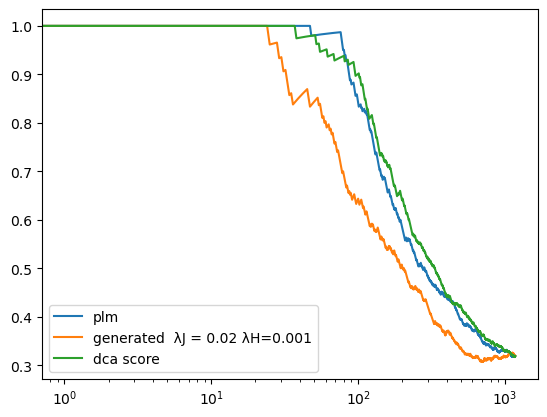

(0.7022602821872387, 1673.1688090637567)

In [5]:
plotres(out)